# <center> 👉 class_07_3 IP » _Image Denoising - Non-Local Means Denoising_ </center>

https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html
https://ipolcore.ipol.im/demo/clientApp/demo.html?id=55&key=1AAEFF895943BA250B3A760AAAF0AF10    

We have seen many image smoothing techniques like   
- Gaussian Blurring, Median Blurring etc and   
- they were good to some extent in removing small quantities of noise.   
- In those techniques, we took a small neighbourhood around a pixel and did some operations like gaussian weighted average, median of the values etc to replace the central element.   

In short, noise removal at a pixel was local to its neighbourhood.
        픽셀의 노이즈 제거는 해당 픽셀 근처에만 국한되었습니다.  
    
There is a property of noise.   
- Noise is generally considered to be a random variable with zero mean.   
        Noise는 일반적으로 평균이 0인 random variable로 간주됩니다.
- Consider a noisy pixel, p=p0+n where p0 is the true value of pixel and n is the noise in that pixel.   
- You can take large number of same pixels (say N) from different images and computes their average.   
- Ideally, you should get p=p0 since mean of noise is zero.

So idea is simple, we need a set of similar images to average out the noise.   

- Consider a small window (say 5x5 window) in the image.   
- Chance is large that the same patch may be somewhere else in the image.   
- Sometimes in a small neighbourhood around it.   
- What about using these similar patches together and find their average?   
- For that particular window, that is fine. See an example image below:  
    
<img src='./images/practice_img/denoise1.jpg' align='left' width=350 height=200><img src='./images/practice_img/denoise0.jpg'  width=250 height=300>    


https://www.wisdom.weizmann.ac.il/~vision/SingleImageSR.html

* The blue patches in the image looks the similar.   
* Green patches looks similar.   

So we take a pixel, take small window around it, search for similar windows in the image, average all the windows and replace the pixel with the result we got.  
This method is **Non-Local Means Denoising.**   
- It takes more time compared to blurring techniques we saw earlier, but its result is very good.   

For color images, image is converted to CIELAB colorspace and then it separately denoise L and AB components.  
➡️ https://en.wikipedia.org/wiki/CIELAB_color_space

## ▶ Image Denoising in OpenCV  

OpenCV provides four variations of this technique.

- **cv.fastNlMeansDenoising()** - works with a single grayscale images
- **cv.fastNlMeansDenoisingColored()** - works with a color image.
- **cv.fastNlMeansDenoisingMulti()** - works with image sequence captured in short period of time (grayscale images)
- **cv.fastNlMeansDenoisingColoredMulti()** - same as above, but for color images.

Common parameters are:

- **h :** parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
- **hForColorComponents :** same as h, but for color images only. (normally same as h)
- **templateWindowSize :** should be odd. (recommended 7)
- **searchWindowSize :** should be odd. (recommended 21)

~ Examples: **cv.fastNlMeansDenoisingColored()** and **cv.fastNlMeansDenoisingMulti()**.   

## 1. cv.fastNlMeansDenoisingColored()  
As mentioned above it is used to remove noise from color images.   
(Noise is expected to be gaussian). See the example below:

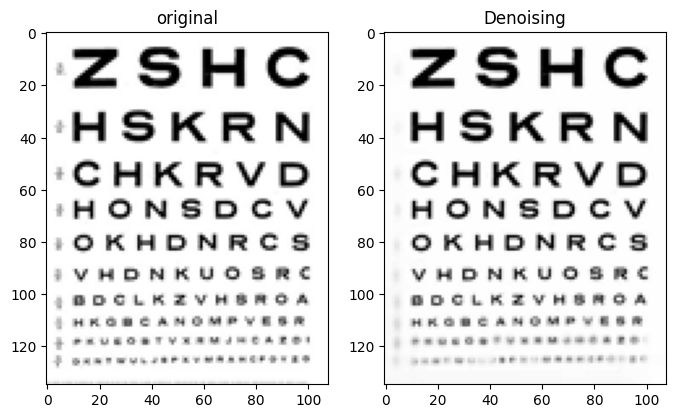

In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/practice_img/denoise_ex1.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

figure(figsize=(8, 8), dpi=100)

plt.subplot(121),plt.imshow(img),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('Denoising')
plt.show()

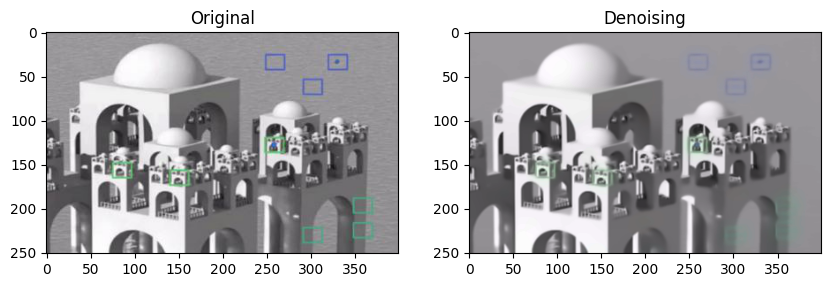

In [8]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/practice_img/denoise1.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

figure(figsize=(10, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Denoising')
plt.show()

## ▶ 2. cv.fastNlMeansDenoisingMulti()  

Now we will apply the same method to a video.   
- The first argument is the list of noisy frames.   
- Second argument imgToDenoiseIndex specifies which frame we need to denoise, for that we pass the index of frame in our input list.   
- Third is the temporalWindowSize which specifies the number of nearby frames to be used for denoising.   
- It should be odd. In that case, a total of temporalWindowSize frames are used where central frame is the frame to be denoised.   
>- For example, let's passed a list of 5 frames as input.   
>- Let imgToDenoiseIndex = 2 and temporalWindowSize = 3.   
>- Then frame-1, frame-2 and frame-3 are used to denoise frame-2.   

Let's see an example.

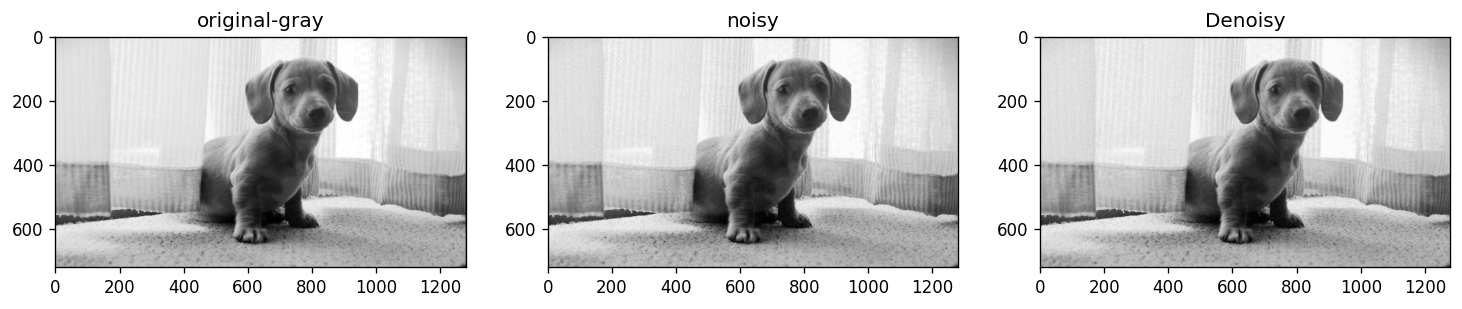

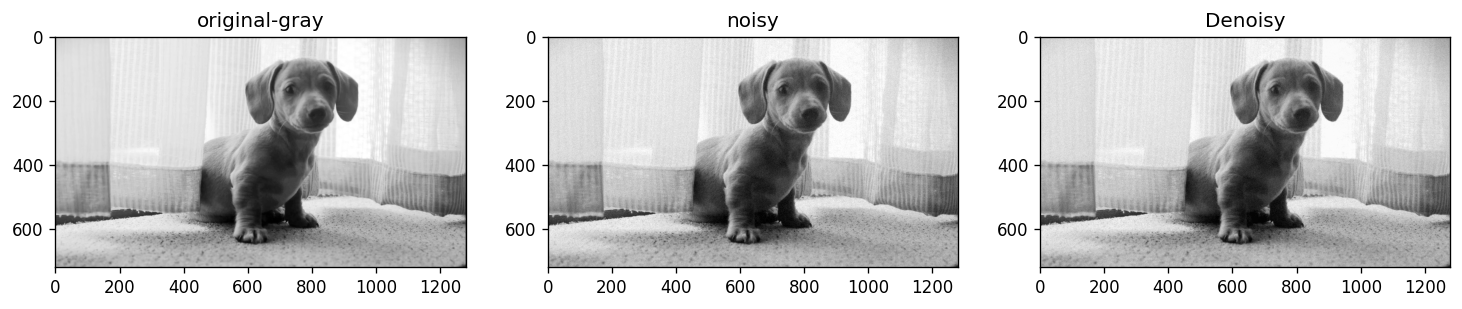

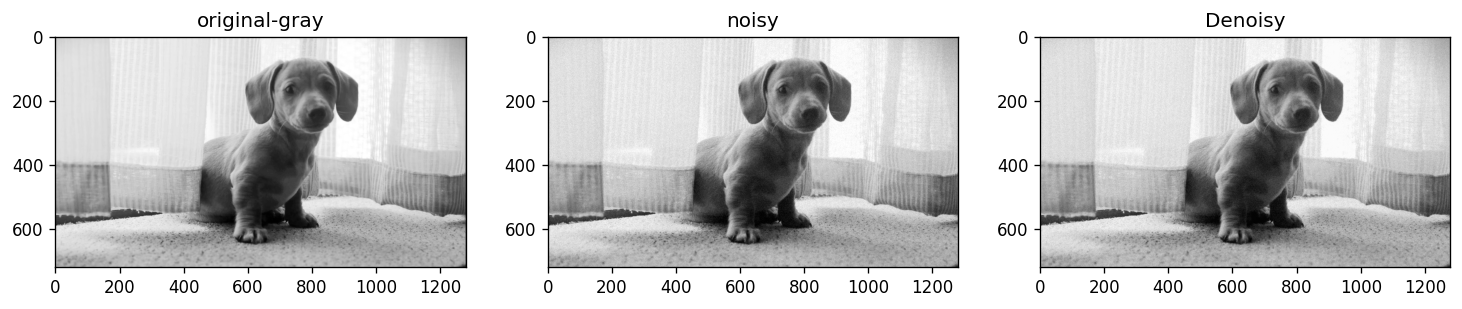

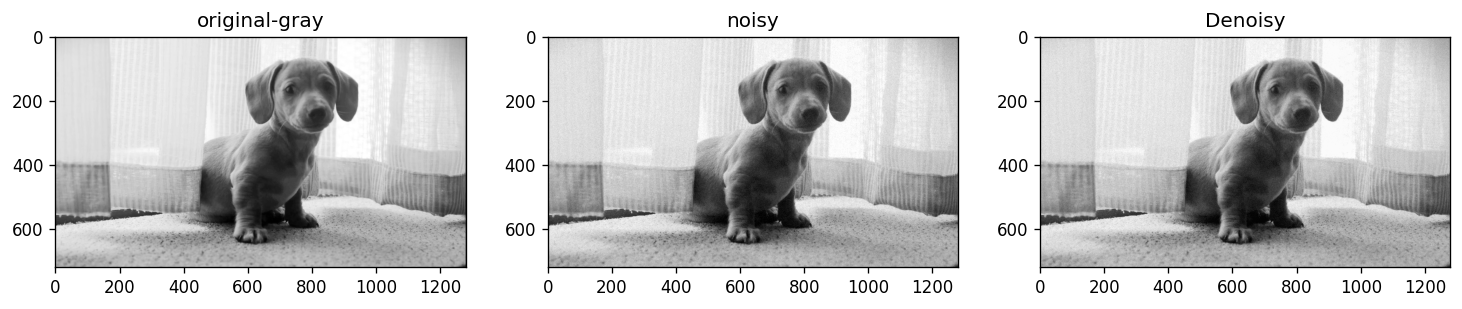

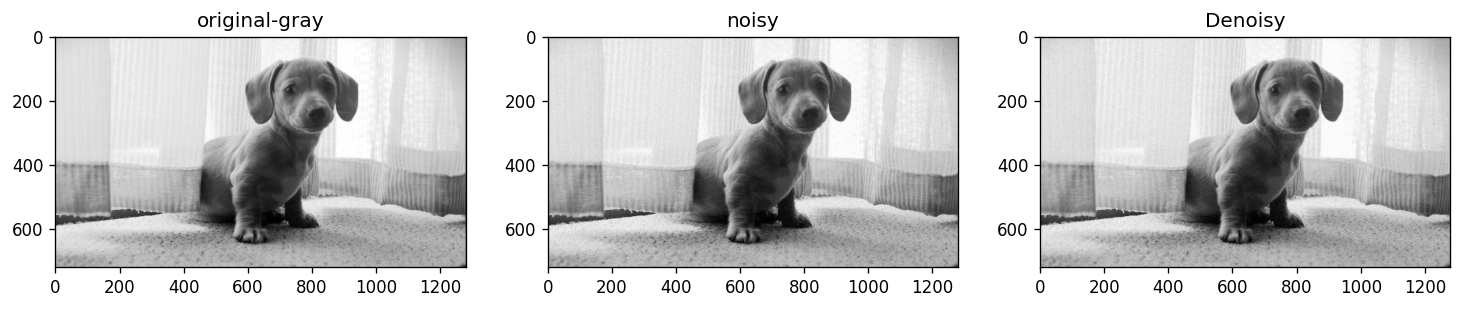

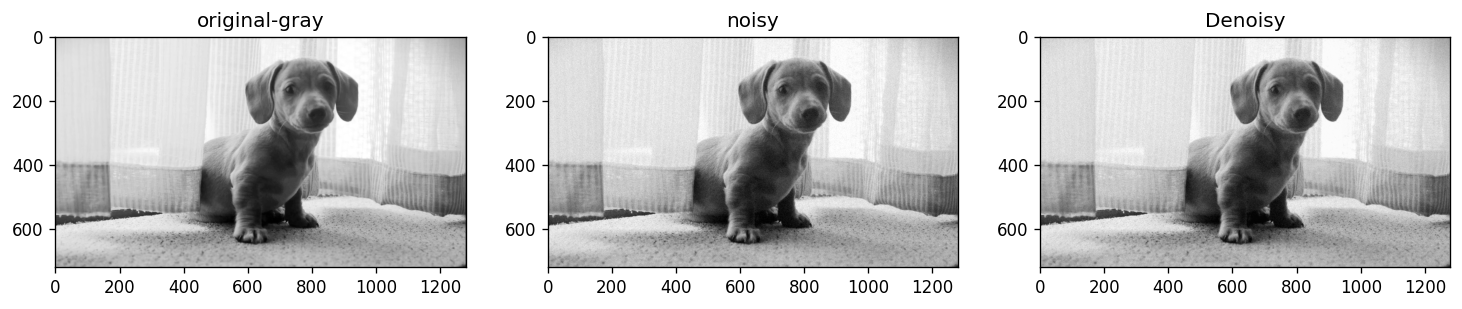

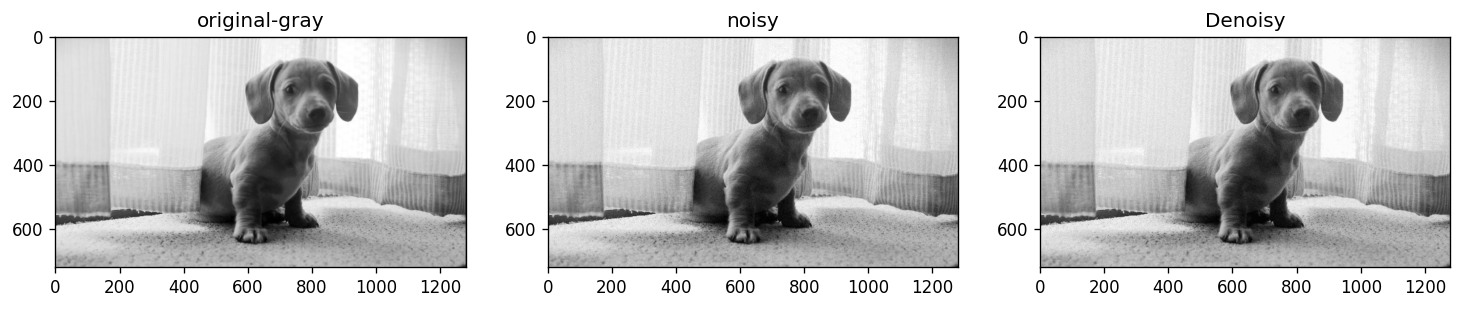

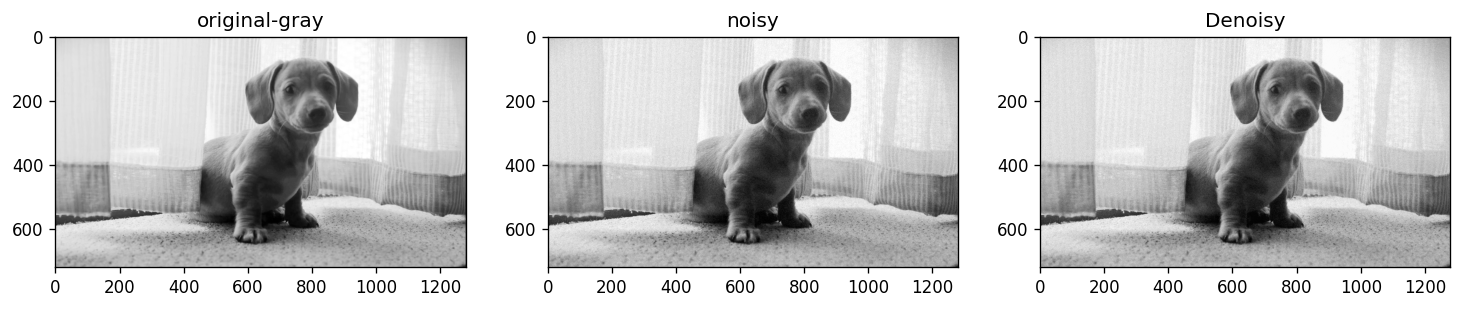

4.81 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

cap = cv.VideoCapture('./Videos/dog.mp4') # London_Street.mp4  car_drive.mp4
img = [cap.read()[1] for i in range(5)]                 # create a list of first 5 frames
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img] # convert all to grayscale
gray = [np.float64(i) for i in gray]                    # convert all to float64
noise = np.random.randn(*gray[1].shape)*10              # create a noise of variance 25
noisy = [i+noise for i in gray]                         # Add this noise to images
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]     # Convert back to uint8
dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35) # Denoise 3rd frame considering all the 5 frames

figure(figsize=(15, 10), dpi=120)

plt.subplot(131),plt.imshow(gray[2],'gray'),plt.title('original-gray')
plt.subplot(132),plt.imshow(noisy[2],'gray'),plt.title('noisy')
plt.subplot(133),plt.imshow(dst,'gray'),plt.title('Denoisy')
plt.show()

In [ ]:
Additional Resources 
http://www.ipol.im/pub/art/2011/bcm_nlm/ (It has the details, online demo etc. Highly recommended to visit.)